In [16]:
from pathlib import Path
import pandas as pd
import plotly.express as px
import pickle
import json

In [3]:
DATA_PATH = "../data/in/"
DATA_PATH_PLOTS = "../data/plots/"

In [4]:
with open(Path(DATA_PATH, "dizionario_df_materie.pickle"), "rb") as fp:
    dizionario_df_materie = pickle.load(fp)

In [6]:
dizionario_df_materie.keys()

dict_keys(['df_geo_mat_21', 'df_geo_ita_21', 'df_geo_ing_21'])

In [8]:
dizionario_df_materie["df_geo_mat_21"]

,codice_provincia,sigla_provincia,nome_provincia,grado,materia,anno,livello_1,livello_2,livello_3,livello_4,livello_5,perc_copertura_stu,punteggio_medio_wle,deviazione_standard_wle,perc_copertura_stu_punteggi,minore_95,95_110,maggiore_110
15,1,TO,TORINO,13,Matematica,2021-22,18.632435,22.235638,24.199288,16.344687,18.587951,95.589843,199.415644,37.124716,95.589843,40.9,24.2,34.9
33,2,VC,VERCELLI,13,Matematica,2021-22,27.983193,21.512605,22.773109,14.369748,13.361345,93.260188,190.868668,36.919625,93.260188,49.5,22.8,27.7
51,3,NO,NOVARA,13,Matematica,2021-22,16.444629,22.231474,24.271440,19.233972,17.818485,95.849960,200.832549,35.185648,95.849960,38.7,24.3,37.1
69,4,CN,CUNEO,13,Matematica,2021-22,12.263716,19.363762,24.942370,19.271554,24.158598,97.264574,207.447844,36.615234,97.264574,31.6,24.9,43.4
87,5,AT,ASTI,13,Matematica,2021-22,18.210610,22.802850,21.773555,17.022961,20.190024,97.004608,200.658912,37.663749,97.004608,41.0,21.8,37.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,103,VB,VERBANO-CUSIO-OSSOLA,13,Matematica,2021-22,15.599343,21.510673,24.220033,18.472906,20.197044,97.284345,202.729986,35.720856,97.284345,37.1,24.2,38.7
1869,108,MB,MONZA E DELLA BRIANZA,13,Matematica,2021-22,13.798244,19.496439,23.803214,18.204406,24.697698,96.964343,206.975814,38.179308,96.964343,33.3,23.8,42.9
1887,109,FM,FERMO,13,Matematica,2021-22,27.245731,18.485523,20.786934,15.515961,17.965850,95.871886,193.786602,40.917872,95.871886,45.7,20.8,33.5
1905,110,BT,BARLETTA-ANDRIA-TRANI,13,Matematica,2021-22,33.607856,24.358568,19.638898,11.181501,11.213177,94.042300,184.972911,37.107693,94.042300,58.0,19.6,22.4


In [12]:
for key in dizionario_df_materie.keys():
    df = pd.concat(dizionario_df_materie).reset_index()

In [13]:
df

,level_0,level_1,codice_provincia,sigla_provincia,nome_provincia,grado,materia,anno,livello_1,livello_2,livello_3,livello_4,livello_5,perc_copertura_stu,punteggio_medio_wle,deviazione_standard_wle,perc_copertura_stu_punteggi,minore_95,95_110,maggiore_110
0,df_geo_mat_21,15,1,TO,TORINO,13,Matematica,2021-22,18.632435,22.235638,24.199288,16.344687,18.587951,95.589843,199.415644,37.124716,95.589843,40.9,24.2,34.9
1,df_geo_mat_21,33,2,VC,VERCELLI,13,Matematica,2021-22,27.983193,21.512605,22.773109,14.369748,13.361345,93.260188,190.868668,36.919625,93.260188,49.5,22.8,27.7
2,df_geo_mat_21,51,3,NO,NOVARA,13,Matematica,2021-22,16.444629,22.231474,24.271440,19.233972,17.818485,95.849960,200.832549,35.185648,95.849960,38.7,24.3,37.1
3,df_geo_mat_21,69,4,CN,CUNEO,13,Matematica,2021-22,12.263716,19.363762,24.942370,19.271554,24.158598,97.264574,207.447844,36.615234,97.264574,31.6,24.9,43.4
4,df_geo_mat_21,87,5,AT,ASTI,13,Matematica,2021-22,18.210610,22.802850,21.773555,17.022961,20.190024,97.004608,200.658912,37.663749,97.004608,41.0,21.8,37.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,df_geo_ing_21,1889,109,FM,FERMO,13,Inglese L,2021-22,23.002240,40.552651,36.445108,0.000000,0.000000,95.302491,200.665015,39.632675,95.302491,NaN,NaN,NaN
424,df_geo_ing_21,1906,110,BT,BARLETTA-ANDRIA-TRANI,13,Inglese R,2021-22,16.398612,40.775781,42.825607,0.000000,0.000000,94.459339,191.035056,40.572716,94.459339,NaN,NaN,NaN
425,df_geo_ing_21,1907,110,BT,BARLETTA-ANDRIA-TRANI,13,Inglese L,2021-22,35.825150,39.911308,24.263541,0.000000,0.000000,94.042300,188.352457,37.672848,94.042300,NaN,NaN,NaN
426,df_geo_ing_21,1924,111,SU,SUD SARDEGNA,13,Inglese R,2021-22,27.646326,38.293898,34.059776,0.000000,0.000000,92.671668,180.515300,43.408131,92.671668,NaN,NaN,NaN


In [14]:
df_mat = dizionario_df_materie["df_geo_mat_21"]

In [17]:
GEOJSON_PATH = Path(DATA_PATH, "province.geojson")
with open(GEOJSON_PATH, 'r') as fp:
    province_geojson = json.load(fp)
        
for feature_ in province_geojson['features']:
    feature_['id'] = feature_['properties']['SIGLA']

In [20]:
df_mat.head()

,codice_provincia,sigla_provincia,nome_provincia,grado,materia,anno,livello_1,livello_2,livello_3,livello_4,livello_5,perc_copertura_stu,punteggio_medio_wle,deviazione_standard_wle,perc_copertura_stu_punteggi,minore_95,95_110,maggiore_110
15,1,TO,TORINO,13,Matematica,2021-22,18.632435,22.235638,24.199288,16.344687,18.587951,95.589843,199.415644,37.124716,95.589843,40.9,24.2,34.9
33,2,VC,VERCELLI,13,Matematica,2021-22,27.983193,21.512605,22.773109,14.369748,13.361345,93.260188,190.868668,36.919625,93.260188,49.5,22.8,27.7
51,3,NO,NOVARA,13,Matematica,2021-22,16.444629,22.231474,24.271440,19.233972,17.818485,95.849960,200.832549,35.185648,95.849960,38.7,24.3,37.1
69,4,CN,CUNEO,13,Matematica,2021-22,12.263716,19.363762,24.942370,19.271554,24.158598,97.264574,207.447844,36.615234,97.264574,31.6,24.9,43.4
87,5,AT,ASTI,13,Matematica,2021-22,18.210610,22.802850,21.773555,17.022961,20.190024,97.004608,200.658912,37.663749,97.004608,41.0,21.8,37.2


In [22]:
import pysal as ps
import shapely.geometry as shg
from matplotlib import pyplot as plt
import seaborn as sns
import fiona
import geopandas as gpd
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights
from splot import esda as esdaplot

/home/simonet/bin/miniconda3/envs/lavoro/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.11.0-CAPI-1.17.0). Conversions between both will be slow.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/home/simonet/bin/miniconda3/envs/lavoro/lib/python3.10/site-packages/spaghetti/network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [25]:
METRICHE = ["minore_95", "95_110", "maggiore_110"]

In [23]:
geo_df = gpd.read_file(GEOJSON_PATH)

In [ ]:
df_lisa = pd.merge(left=geo_df,
                  right=df_mat[["sigla_provincia", METRICHE[i]]],)


ANALISI SULLA METRICA: minore_95
(107, 15)

(107, 3)


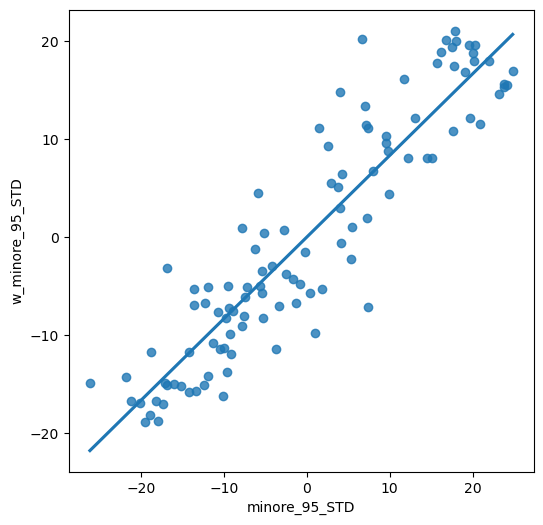

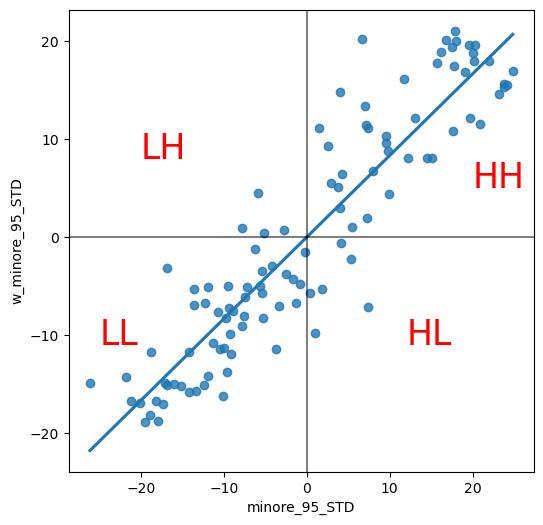

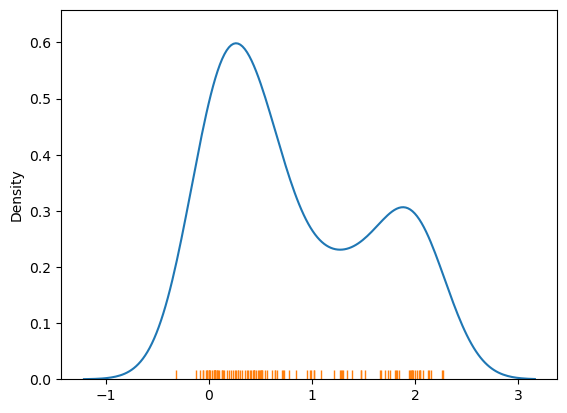

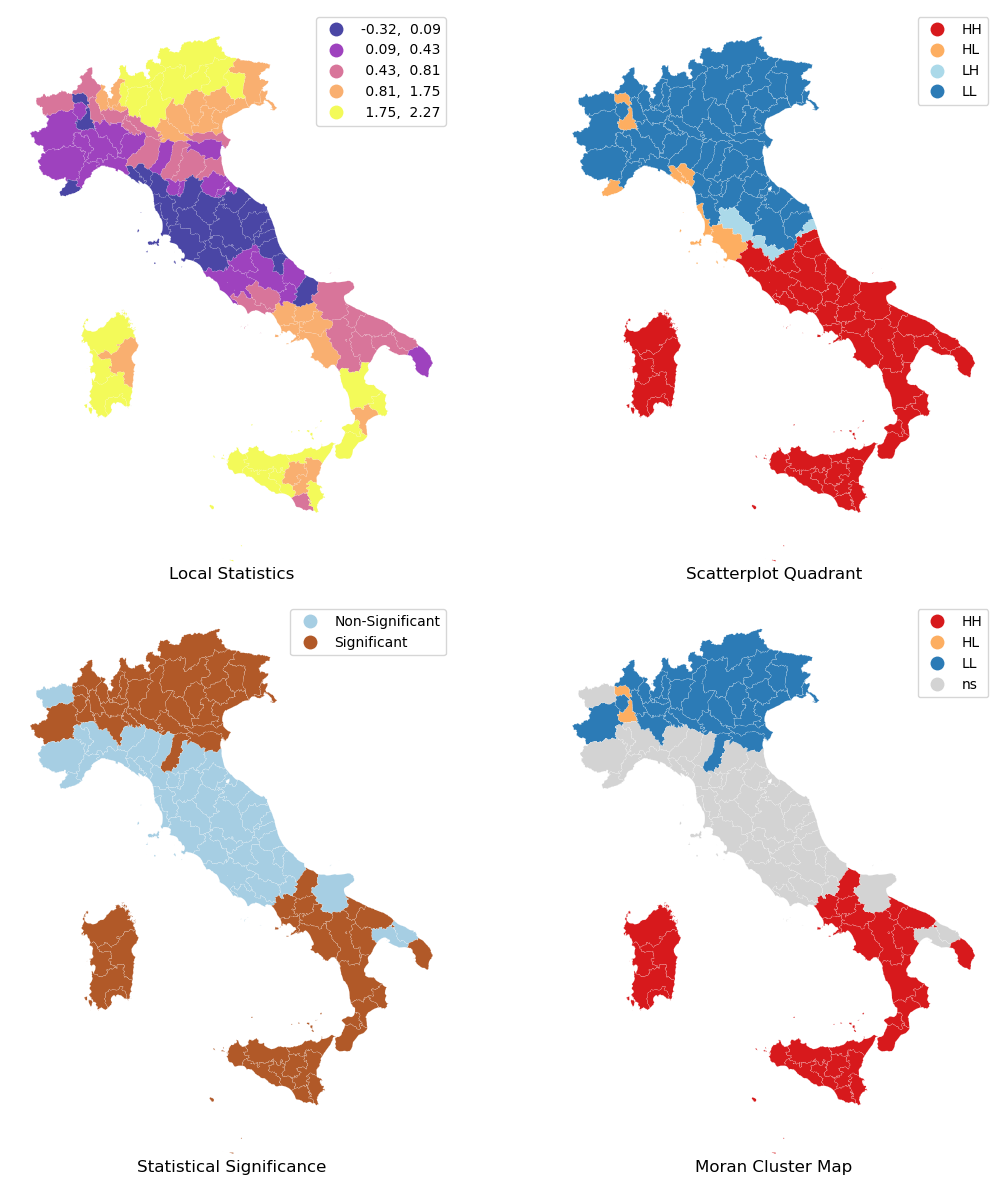

<Figure size 640x480 with 0 Axes>

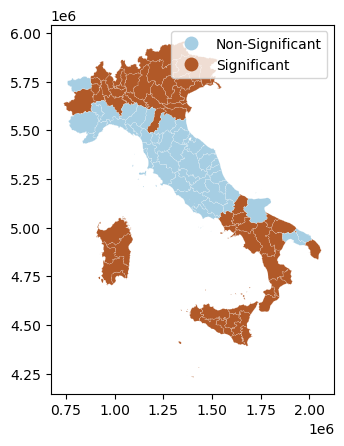


ANALISI SULLA METRICA: 95_110
(107, 15)

(107, 3)


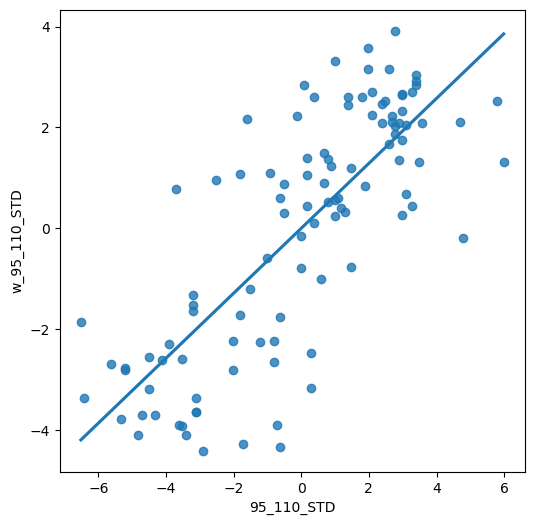

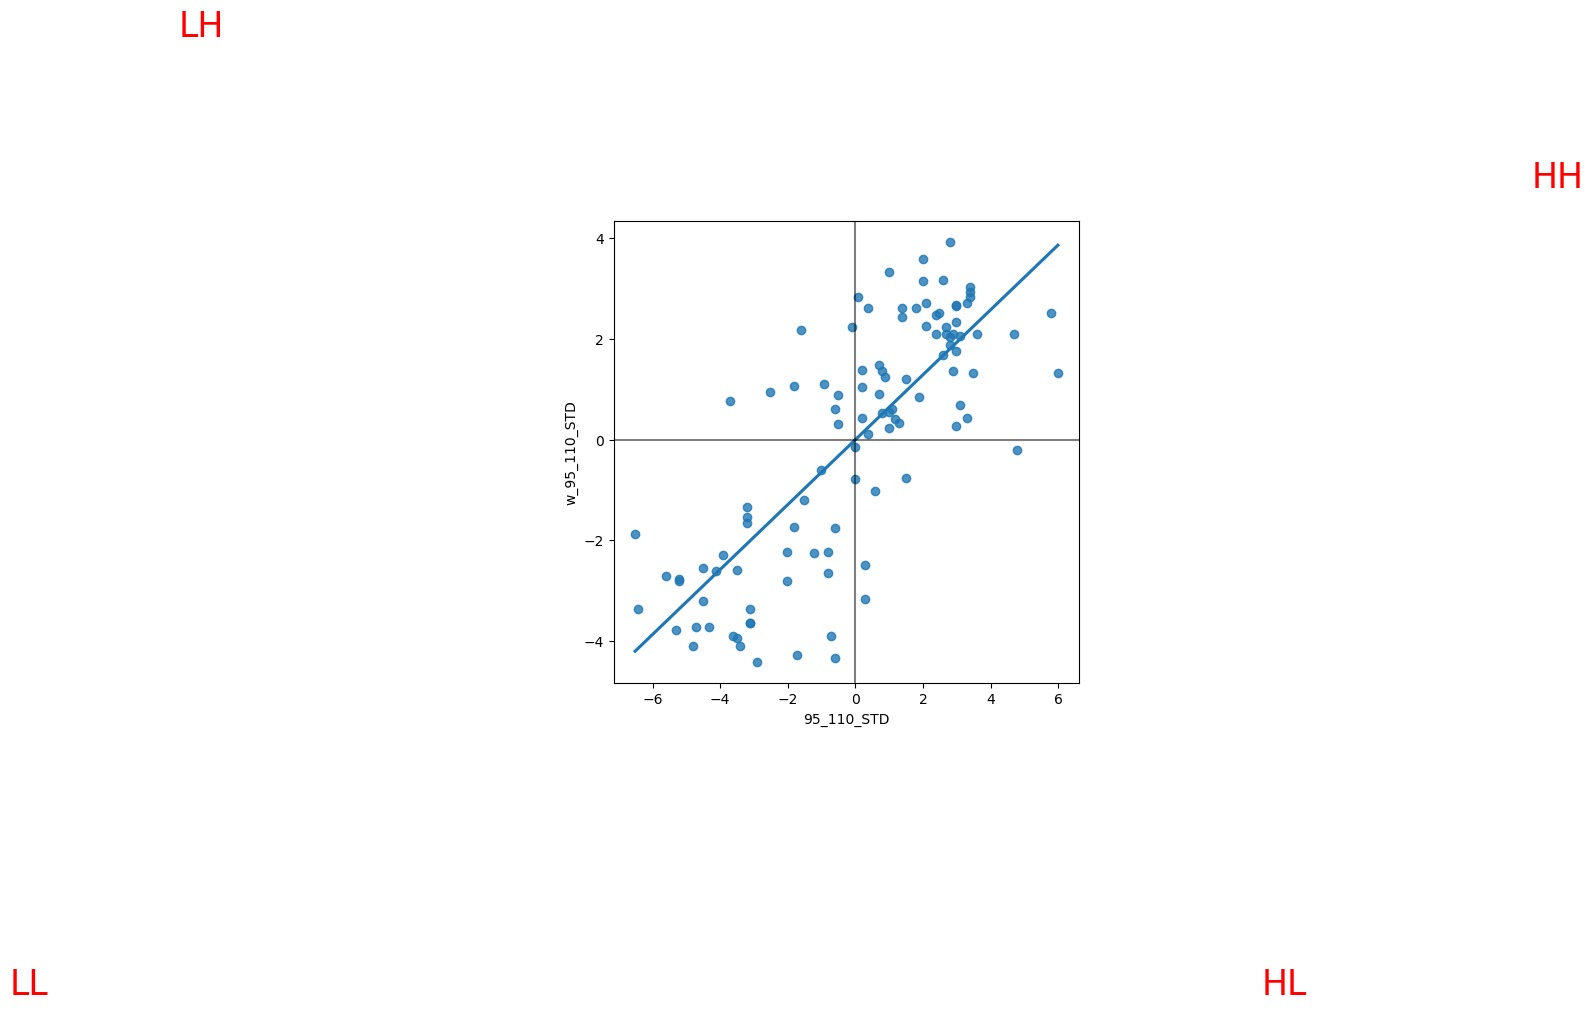

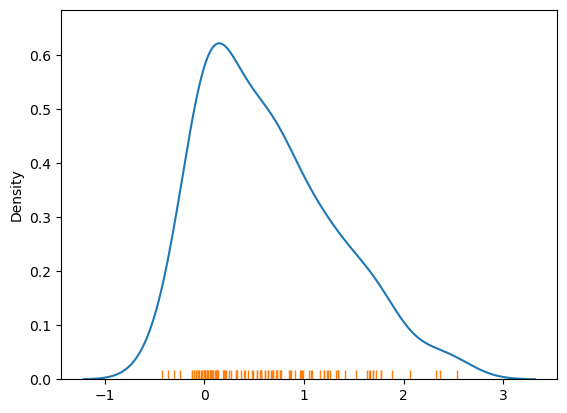

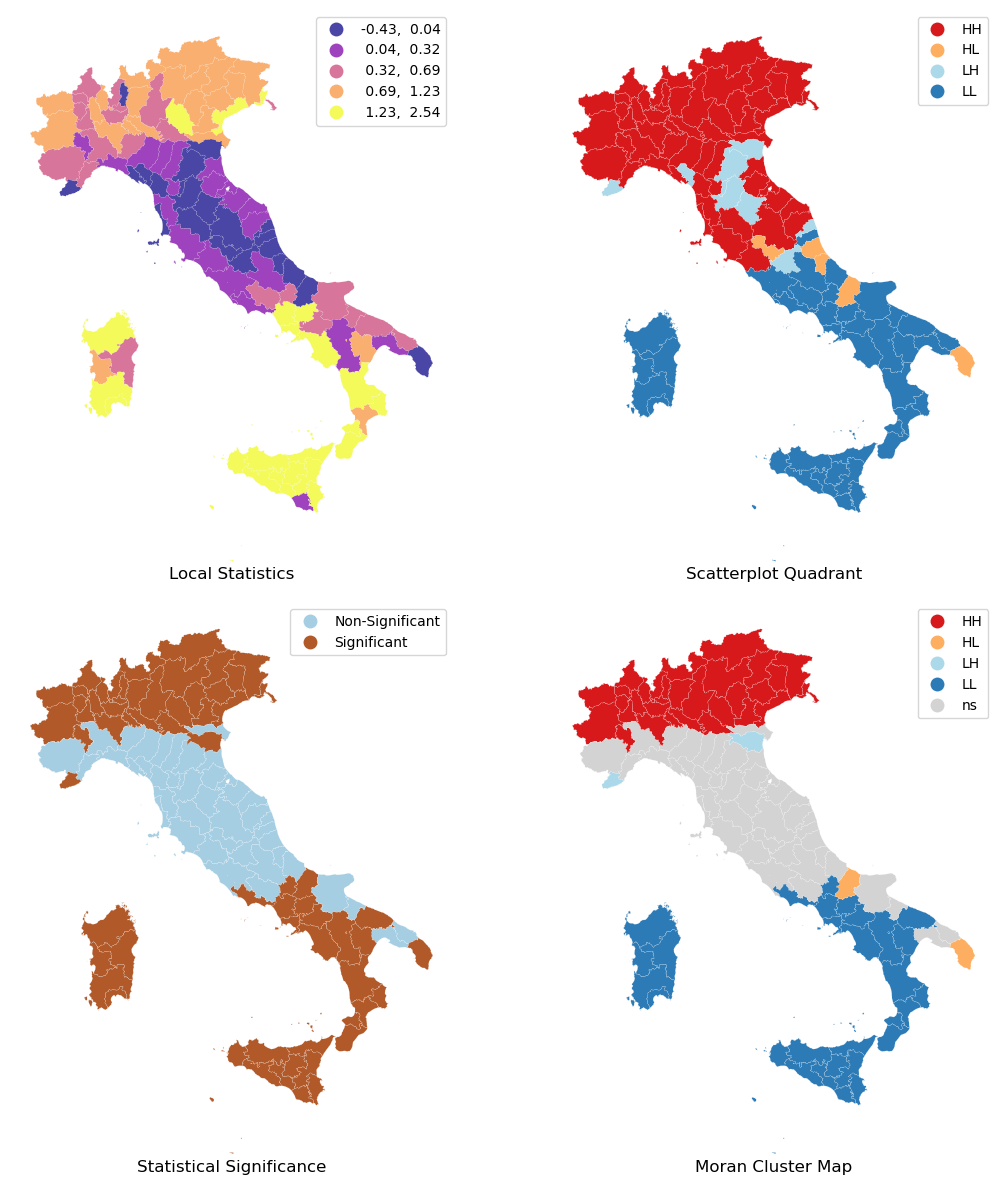

<Figure size 640x480 with 0 Axes>

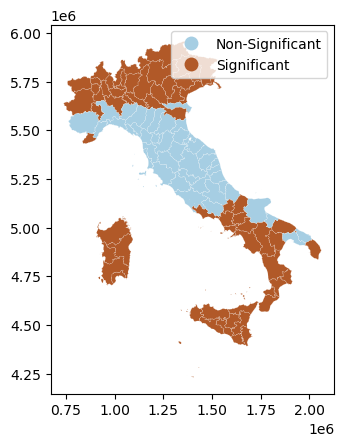


ANALISI SULLA METRICA: maggiore_110
(107, 15)

(107, 3)


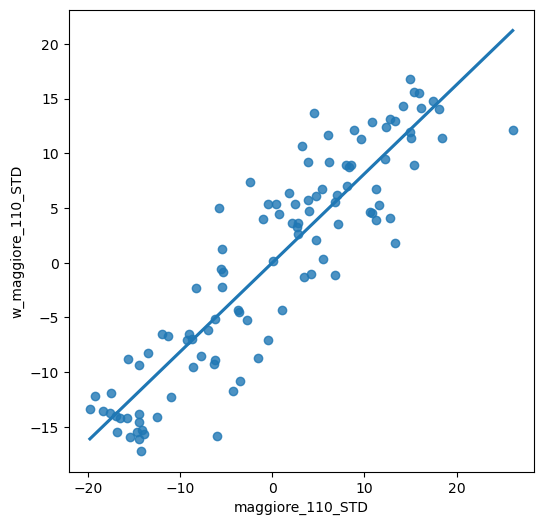

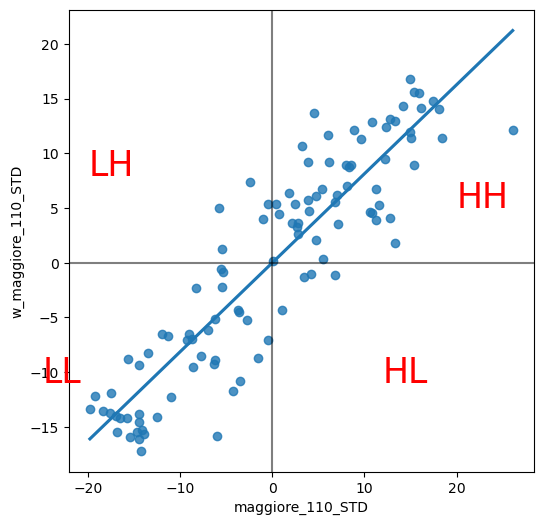

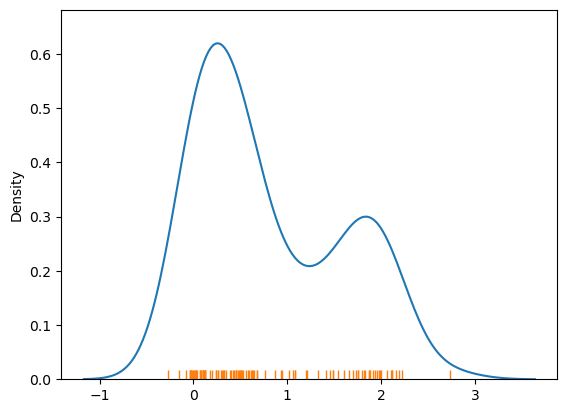

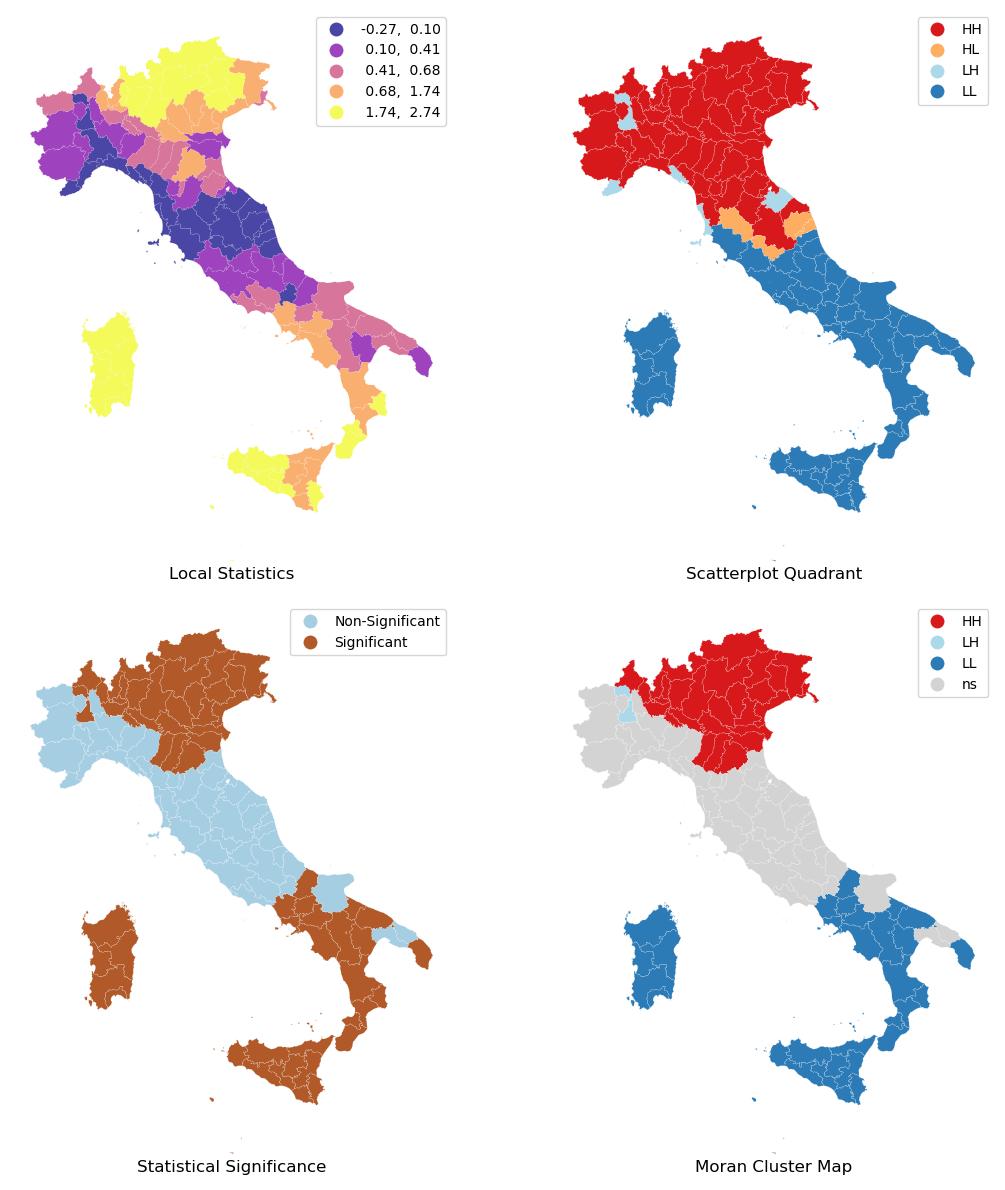

<Figure size 640x480 with 0 Axes>

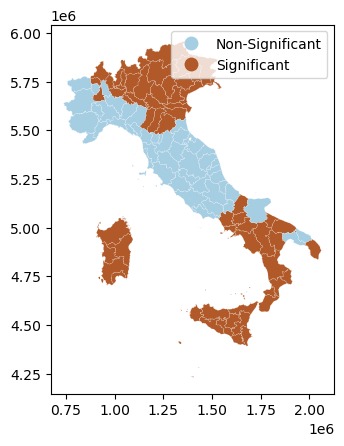

In [29]:
for i in range(len(METRICHE)):
    metrica = METRICHE[i]
    print()
    print(f"ANALISI SULLA METRICA: {METRICHE[i]}")
    geo_df = gpd.read_file(GEOJSON_PATH)

    df_lisa = pd.merge(left=geo_df,
                   right=df_mat[["sigla_provincia",METRICHE[i]]],
                   left_on="SIGLA",
                   right_on="sigla_provincia",
                   how="left")
    print(df_lisa.shape)
    df = gpd.GeoDataFrame(df_lisa,crs=df_lisa.crs).to_crs(epsg=3857)[["SIGLA",METRICHE[i],"geometry"]]
    df = df.drop(df[df[METRICHE[i]].isnull()].index, axis=0)
    print()
    print(df.shape)
    # Generate W from the GeoDataFrame     
    #w = weights.Queen.from_dataframe(df)     #COMMENTA-UNCOMMENTA SE VUOI USARE LA QUEEN
    
    w = weights.distance.KNN.from_dataframe(df, k=6) #COMMENTA-UNCOMMENTA SE VUOI USARE IL KNN
    # Row-standardization
    w.transform = "R"

    #CALCOLO IL LAG SPAZIALE:
    df["w_"+METRICHE[i]] = weights.spatial_lag.lag_spatial(
        w, df[METRICHE[i]]
    )
    
    #STANDARDIZZAZIONE:
    df[METRICHE[i]+"_STD"] = df[METRICHE[i]] - df[METRICHE[i]].mean()
    df["w_"+METRICHE[i]+"_STD"] = df["w_"+METRICHE[i]] - df["w_"+METRICHE[i]].mean()
    
    #CALCOLO I LISA:
    lisa = esda.moran.Moran_Local(df[METRICHE[i]], w)
    
    # Setup the figure and axis
    f, ax = plt.subplots(1, figsize=(6, 6))
    # Plot values
    sns.regplot(
        x=METRICHE[i]+"_STD", y="w_"+METRICHE[i]+"_STD", data=df, ci=None
    );
    
    # Setup the figure and axis
    f, ax = plt.subplots(1, figsize=(6, 6))
    # Plot values
    sns.regplot(
        x=METRICHE[i]+"_STD", y="w_"+METRICHE[i]+"_STD", data=df, ci=None
    )
    # Add vertical and horizontal lines
    plt.axvline(0, c="k", alpha=0.5)
    plt.axhline(0, c="k", alpha=0.5)
    # Add text labels for each quadrant
    plt.text(20, 5, "HH", fontsize=25, c="r")
    plt.text(12, -11, "HL", fontsize=25, c="r")
    plt.text(-20, 8.0, "LH", fontsize=25, c="r")
    plt.text(-25, -11.0, "LL", fontsize=25, c="r")
    # Display
    plt.gcf()
    #plt.savefig('moranI.png', dpi=100)                              #UNCOMMENTA SE VUOI SALVARE L'IMMAGINE
    plt.show()
    
    # Draw KDE line
    ax = sns.kdeplot(lisa.Is)
    # Add one small bar (rug) for each observation
    # along horizontal axis
    sns.rugplot(lisa.Is, ax=ax);
    
    f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
    # Make the axes accessible with single indexing
    axs = axs.flatten()

    # Subplot 1 #
    # Choropleth of local statistics
    # Grab first axis in the figure
    ax = axs[0]
    # Assign new column with local statistics on-the-fly
    df.assign(
        Is=lisa.Is
        # Plot choropleth of local statistics
    ).plot(
        column="Is",
        cmap="plasma",
        scheme="quantiles",
        k=5,
        edgecolor="white",
        linewidth=0.1,
        alpha=0.75,
        legend=True,
        ax=ax,
    )

    # Subplot 2 #
    # Quadrant categories
    # Grab second axis of local statistics
    ax = axs[1]
    # Plot Quandrant colors (note to ensure all polygons are assigned a
    # quadrant, we "trick" the function by setting significance level to
    # 1 so all observations are treated as "significant" and thus assigned
    # a quadrant color
    esdaplot.lisa_cluster(lisa, df, p=1, ax=ax)

    # Subplot 3 #
    # Significance map
    # Grab third axis of local statistics
    ax = axs[2]
    #
    # Find out significant observations
    labels = pd.Series(
        1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
        index=df.index  # Use the index in the original data
        # Recode 1 to "Significant and 0 to "Non-significant"
    ).map({1: "Significant", 0: "Non-Significant"})
    # Assign labels to `db` on the fly
    df.assign(
        cl=labels
        # Plot choropleth of (non-)significant areas
    ).plot(
        column="cl",
        categorical=True,
        k=2,
        cmap="Paired",
        linewidth=0.1,
        edgecolor="white",
        legend=True,
        ax=ax,
    )

    # Subplot 4 #
    # Cluster map
    # Grab second axis of local statistics
    ax = axs[3]
    # Plot Quandrant colors In this case, we use a 5% significance
    # level to select polygons as part of statistically significant
    # clusters
    esdaplot.lisa_cluster(lisa, df, p=0.05, ax=ax)

    # Figure styling #
    # Set title to each subplot
    for i, ax in enumerate(axs.flatten()):
        ax.set_axis_off()
        ax.set_title(
            [
                "Local Statistics",
                "Scatterplot Quadrant",
                "Statistical Significance",
                "Moran Cluster Map",
            ][i],
            y=0,
        )
    # Tight layout to minimise in-betwee white space
    f.tight_layout()

    # Display the figure
    plt.gcf()
    #plt.savefig(Path(PERCORSO_IN,"immagini",'LISA_'+metrica+'.png'), dpi=100) #UNCOMMENTA SE VUOI SALVARE L'IMMAGINE
    plt.show()
    
    esdaplot.lisa_cluster(lisa, df, p=0.05, ax=ax)
    plt.figsize=(30, 30)
    df.assign(
        cl=labels
        # Plot choropleth of (non-)significant areas
    ).plot(
        column="cl",
        categorical=True,
        k=2,
        cmap="Paired",
        linewidth=0.1,
        edgecolor="white",
        legend=True,
        #ax=ax
    )
    #
    # Subplot 4 #
    # Cluster map
    # Grab second axis of local statistics
    # Plot Quandrant colors In this case, we use a 5% significance
    # level to select polygons as part of statistically significant
    # clusters
    plt.gcf()
    #plt.savefig(Path(PERCORSO_IN,"immagini",'significa_'+metrica+'.png'), dpi=100) #UNCOMMENTA SE VUOI SALVARE L'IMMAGINE
    plt.show()

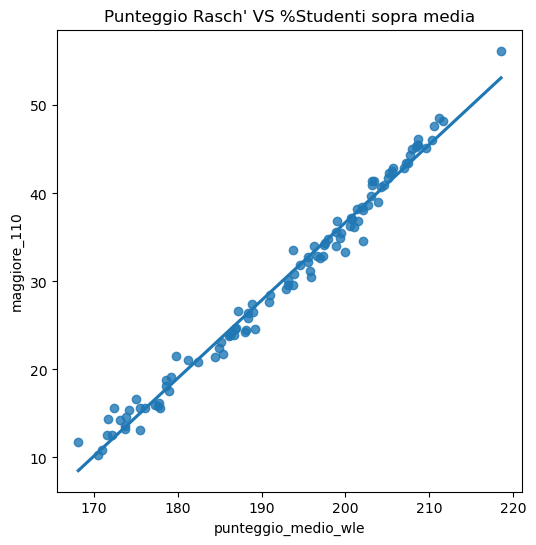

In [31]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
sns.regplot(
    x="punteggio_medio_wle", y="maggiore_110", data=df_mat, 
    ci=None
);
plt.title("Punteggio Rasch' VS %Studenti sopra media")
plt.gcf()
#plt.savefig(Path(PERCORSO_IN,"immagini",'correlazione.png'), dpi=100) #UNCOMMENTA SE VUOI SALVARE
plt.show()

In [40]:
from scipy import stats

In [41]:
# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_mat["maggiore_110"], df_mat["punteggio_medio_wle"])

print(pearson_coef)
print(p_value)

0.9925518304230364
7.854240323868078e-98


### Regressione spaziale:

In [32]:
from pysal.model import spreg

In [33]:
import numpy as np
import libpysal

In [42]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')
#sns.set_style('whitegrid')
#sns.set_style('white')


import geopandas as gpd
import matplotlib.pyplot as plt

import libpysal
from libpysal  import weights
from libpysal.weights import Queen

import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_local_autocorrelation
from splot.libpysal import plot_spatial_weights

from giddy.directional import Rose

from spreg import OLS
from spreg import MoranRes
from spreg import ML_Lag
from spreg import ML_Error

In [43]:
df_mat.columns

Index(['codice_provincia', 'sigla_provincia', 'nome_provincia', 'grado',
       'materia', 'anno', 'livello_1', 'livello_2', 'livello_3', 'livello_4',
       'livello_5', 'perc_copertura_stu', 'punteggio_medio_wle',
       'deviazione_standard_wle', 'perc_copertura_stu_punteggi', 'minore_95',
       '95_110', 'maggiore_110'],
      dtype='object')

In [44]:
geo_df_2 = gpd.read_file(GEOJSON_PATH)

df_lisa_2 = pd.merge(left=geo_df_2,
                   right=df_mat[["sigla_provincia", "maggiore_110", "punteggio_medio_wle"]],
                   left_on="SIGLA",
                   right_on="sigla_provincia",
                   how="left")

In [46]:
df_lisa_2[df_lisa_2["maggiore_110"].isnull()]

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry,sigla_provincia,maggiore_110,punteggio_medio_wle


In [47]:
df_lisa_2.shape

(107, 16)

In [48]:
W = weights.KNN.from_dataframe(df_lisa_2, k=6)

In [49]:
W.transform = 'r'

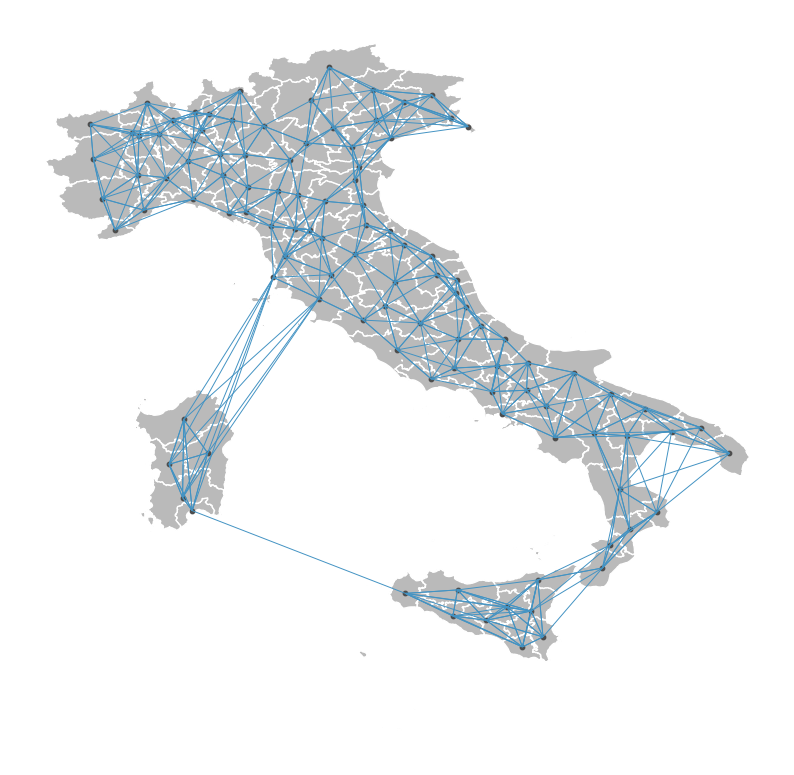

In [50]:
plot_spatial_weights(W, df_lisa_2);

In [51]:
y_2 = df_lisa_2['maggiore_110'].values
y_2_name = 'Perc_sopramedia'
x_2 = np.array([df_lisa_2["punteggio_medio_wle"]]).T
x_2_name = 'Punteggio Medio Rasch'

In [53]:
#OLS SPAZIALE PER STUDENTI BRAVI:
ols_spaziale_2 = spreg.OLS(y_2, x_2, W,
          spat_diag=True,
          moran=True,
          name_y='Perc. Studenti Bravi', 
          name_x=['Punteggio Rasch Medio'], 
          name_ds='INVALSI', 
          white_test=True)
print(ols_spaziale_2.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     INVALSI
Weights matrix      :     unknown
Dependent Variable  :Perc. Studenti Bravi                Number of Observations:         107
Mean dependent var  :     30.1103                Number of Variables   :           2
S.D. dependent var  :     10.9717                Degrees of Freedom    :         105
R-squared           :      0.9852
Adjusted R-squared  :      0.9850
Sum squared residual:     189.372                F-statistic           :   6970.0598
Sigma-square        :       1.804                Prob(F-statistic)     :   7.854e-98
S.E. of regression  :       1.343                Log likelihood        :    -182.369
Sigma-square ML     :       1.770                Akaike info criterion :     368.738
S.E of regression ML:      1.3304                Schwarz criterion     :     374.083

---------------------------------------------------------------------

1) R-squared = 0.9852 => il 98% della varianza in percentuale studenti bravi è causato dalla varianza in Punteggio Rasch Medio\
2) Prob(F-statistic) = 7.854e-98 => il P-value è praticamente 0 quindi il test è statisticamente significativo\
3) I coefficienti della variabile indipendente:\
    Punteggio Rasch Medio  0.8839373   0.0105877  83.4868841  0.0000000 \
    Se aumentiamo di 1 punto il Punteggio Rasch Medio, la percentuale di studenti sopra la media aumenterà di 0.88 punti percentuale